In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data from CSV file
data = pd.read_csv('D:\Personal projects\EMPLOYEE ATTRITION\EAA\HR-Employee-Attrition.csv')
print(data.head())
print(data.describe())



   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [25]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18'])

# Convert target variable to binary numeric value
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Explore data
print(data.head())
print(data.describe())




   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0       

In [28]:
for col in data.select_dtypes(include=['object']).columns:
    print(col, data[col].unique())

In [52]:
# Split data into training and testing sets
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 0.8741496598639455


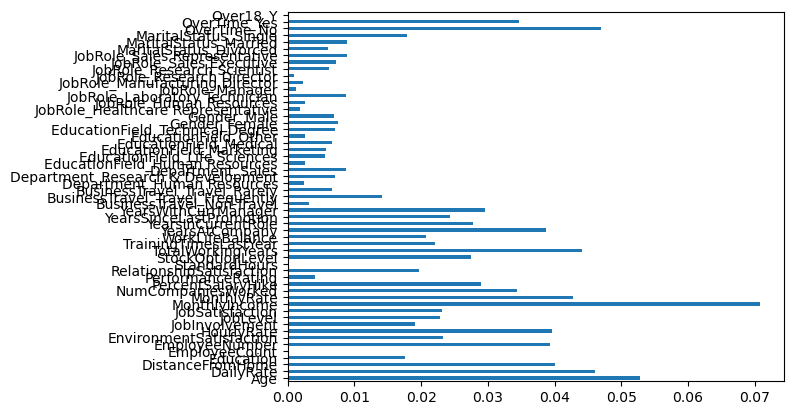

In [54]:
# Predict on testing data
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Visualize feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.plot(kind='barh')
plt.show()